In [12]:
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras

print('[INFO]', tf.config.experimental.list_physical_devices('GPU')[0])

import os
import cv2 as cv
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.axes_grid1 import ImageGrid
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.preprocessing.image import img_to_array

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

2.10.0-dev20220424
[INFO] PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [26]:

dataset_url = "http://groups.csail.mit.edu/vision/LabelMe/NewImages/indoorCVPR_09.tar"
data_dir = keras.utils.get_file(origin=dataset_url, fname="BSR", untar=True)
root_dir = os.path.join(data_dir, "BSDS500/data")

crop_size = 300
upscale_factor = 3
input_size = crop_size // upscale_factor
batch_size = 8

train_ds = image_dataset_from_directory(
    root_dir,
    batch_size=batch_size,
    image_size=(crop_size, crop_size),
    validation_split=0.25,
    subset="training",
    seed=1337,
    label_mode=None,
)

valid_ds = image_dataset_from_directory(
    root_dir,
    batch_size=batch_size,
    image_size=(crop_size, crop_size),
    validation_split=0.25,
    subset="validation",
    seed=1337,
    label_mode=None,
)

def scaling(input_image):
    input_image = input_image / 255.0
    return input_image


# Scale from (0, 255) to (0, 1)
train_ds = train_ds.map(scaling)
valid_ds = valid_ds.map(scaling)

Found 500 files belonging to 1 classes.
Using 375 files for training.
Found 500 files belonging to 1 classes.
Using 125 files for validation.


In [27]:
def pil_to_np_array(pil_image):
    ar = np.array(pil_image)
    if len(ar.shape) == 3:
        ar = ar.transpose(2,0,1)
    else:
        ar = ar[None, ...]
    return ar.astype(np.uint8)


In [28]:
data_set = []

for batch in train_ds.take(100):
    for img in batch:
        data_set.append(np.moveaxis(pil_to_np_array(array_to_img(img)), 0, -1)[:,:,::-1])
        
for batch in valid_ds.take(25):
    for img in batch:
        data_set.append(np.moveaxis(pil_to_np_array(array_to_img(img)), 0, -1)[:,:,::-1])


500


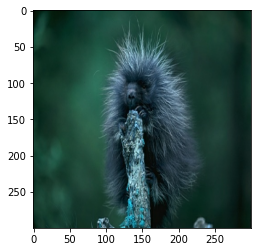

In [25]:
count = 0
for img in data_set :
    cv.imwrite(f'.\\data_set\\img_{count:05}.jpg', img)
    count += 1